# Draw the survival of a sample or a distribution

## Introduction

The goal of this example is to show how to draw the survival function of a sample or a distribution, in linear and logarithmic scales. 

Let $X$ be a random variable with distribution function $F$:
$$
F(x) = P(X\leq x)
$$

for any $x\in\mathbb{R}$. 
The survival function $S$ is:
$$
S(x) = P(X>x) = 1 - P(X\leq x) = 1 - F(x)
$$

for any $x\in\mathbb{R}$. 

Let's assume that $\{x_1,...,x_N\}$ is a sample from $F$. 

Let $\hat{F}_N$ be the empirical cumulative distribution function:
$$
\hat{F}_N(x) = \frac{1}{N} \sum_{i=1}^N \mathbf{1}_{x_i\leq x}
$$

for any $x\in\mathbb{R}$. 
Let $\hat{S}_n$ be the empirical survival function:
$$
\hat{S}_N(x) = \frac{1}{N} \sum_{i=1}^N \mathbf{1}_{x_i>x}
$$

for any $x\in\mathbb{R}$. 

## Motivations for the survival function

For many probabilistic models associated with extreme events or lifetime models, the survival function has a simpler expression than the distribution function. 

* More specifically, several models (e.g. Pareto or Weibull) have a simple expression when we consider the logarithm of the survival function. In this situation, the $(\log(x),\log(S(x)))$ plot is often used. For some distributions, this plot is a straight line. 

* When we consider probabilities very close to 1 (e.g. with extreme events), a loss of precision can occur when we consider the $1-F(x)$ expression with floating point numbers. This loss of significant digits is known as "catastrophic cancellation" in the bibliography and happens when two close floating point numbers are subtracted. This is one of the reasons why we sometimes use directly the survival function instead of the complementary of the distribution.

## Define a distribution

In [1]:
import openturns as ot

In [2]:
sigma = 1.4
xi=0.5
u=0.1
distribution = ot.GeneralizedPareto(sigma, xi, u)

## Draw the survival of a distribution

The `computeCDF` and `computeSurvivalFunction` computes the CDF $F$ and survival $S$ of a distribution. 

In [3]:
p1 = distribution.computeCDF(10.)
p1

0.9513919027838056

In [4]:
p2 = distribution.computeSurvivalFunction(10.)
p2

0.048608097216194426

In [5]:
p1 + p2

1.0

The `drawCDF` and `drawSurvivalFunction` methods allows to draw the functions $F$ and $S$. 

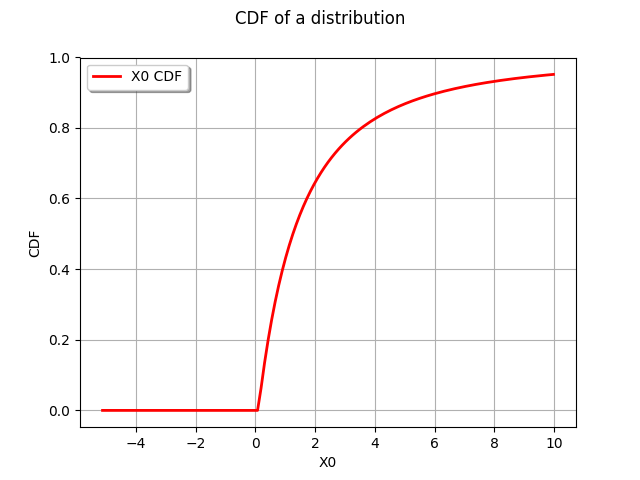

In [6]:
graph = distribution.drawCDF()
graph.setTitle("CDF of a distribution")
graph

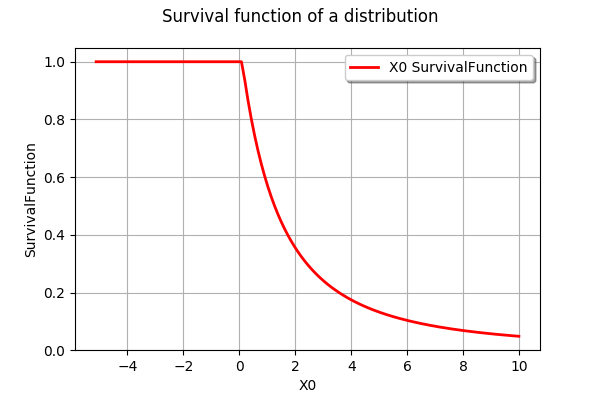

In [7]:
graph = distribution.drawSurvivalFunction()
graph.setTitle("Survival function of a distribution")
graph

In order to get finite bounds for the next graphics, we compute the `xmin` and `xmax` bounds from the 0.01 and 0.99 quantiles of the distributions.

In [8]:
xmin = distribution.computeQuantile(0.01)[0]
xmin

0.11410588272579382

In [9]:
xmax = distribution.computeQuantile(0.99)[0]
xmax

25.29999999999998

The `drawSurvivalFunction` methods also has an option to plot the survival with the X axis in logarithmic scale.

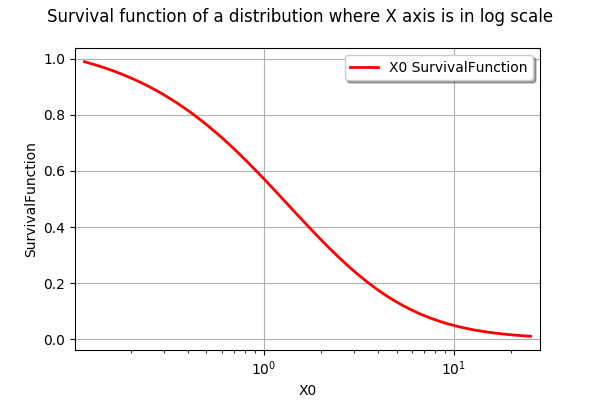

In [10]:
npoints = 50
logScaleX = True
graph = distribution.drawSurvivalFunction(xmin, xmax, npoints, logScaleX)
graph.setTitle("Survival function of a distribution where X axis is in log scale")
graph

In order to get both axes in logarithmic scale, we use the `LOGXY` option of the graph. 

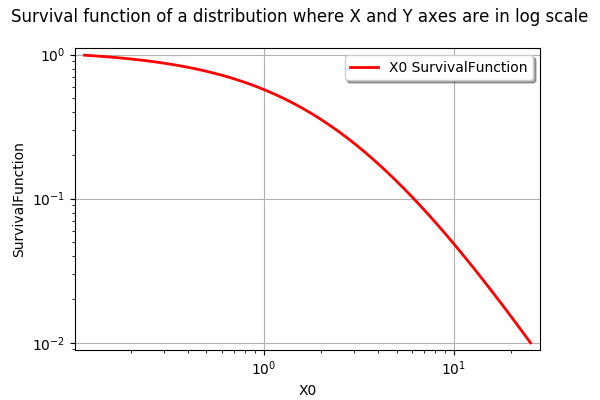

In [11]:
npoints = 50
logScaleX = True
graph = distribution.drawSurvivalFunction(xmin, xmax, npoints, logScaleX)
graph.setLogScale(ot.GraphImplementation.LOGXY)
graph.setTitle("Survival function of a distribution where X and Y axes are in log scale")
graph

## Compute the survival of a sample

We now generate a sample that we are going to analyze. 

In [12]:
sample = distribution.getSample(1000)

In [13]:
sample.getMin(), sample.getMax()

(class=Point name=Unnamed dimension=1 values=[0.102151],
 class=Point name=Unnamed dimension=1 values=[216.528])

The `computeEmpiricalCDF` method of a `Sample` computes the empirical CDF.

In [14]:
p1 = sample.computeEmpiricalCDF([10])
p1

0.95

Activating the second optional argument allows to compute the empirical survival function.

In [15]:
p2 = sample.computeEmpiricalCDF([10], True)
p2

0.05

In [16]:
p1+p2

1.0

## Draw the survival of a sample

In order to draw the empirical functions of a `Sample`, we use the `UserDefined` class. 
* The `drawCDF` method plots the CDF.
* The `drawSurvivalFunction` method plots the survival function.

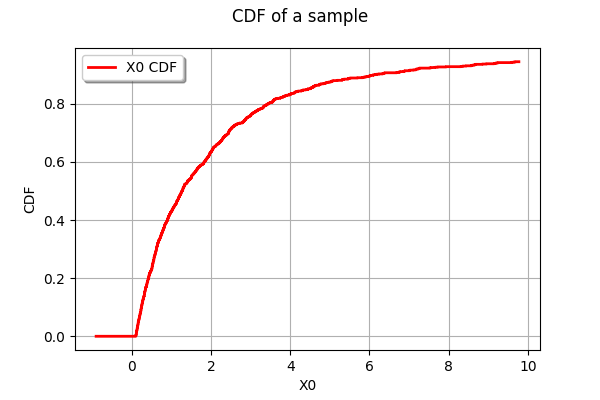

In [17]:
userdefined = ot.UserDefined(sample)
graph = userdefined.drawCDF()
graph.setTitle("CDF of a sample")
graph

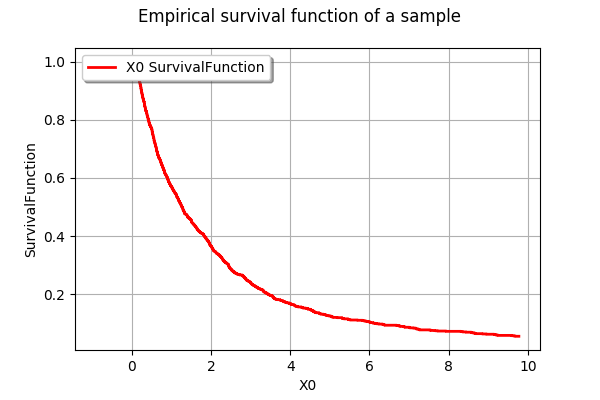

In [18]:
graph = userdefined.drawSurvivalFunction()
graph.setTitle("Empirical survival function of a sample")
graph

As previously, the `drawSurvivalFunction` method of a distribution has an option to set the X axis in logarithmic scale.

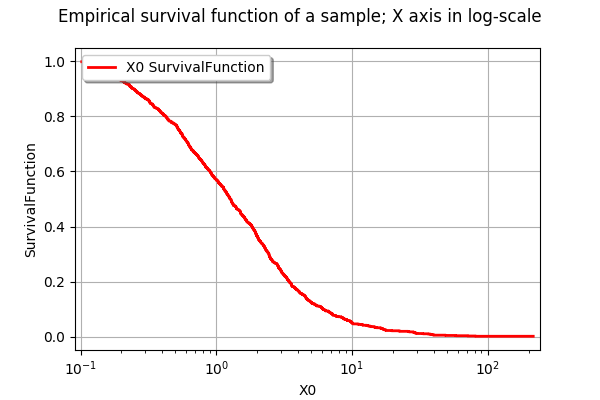

In [19]:
xmin = sample.getMin()[0]
xmax = sample.getMax()[0]
pointNumber = sample.getSize()
logScaleX = True
graph = userdefined.drawSurvivalFunction(xmin, xmax, pointNumber, logScaleX)
graph.setTitle("Empirical survival function of a sample; X axis in log-scale")
graph

We obviously have $P(X>X_{max})=0$, where $X_{max}$ is the sample maximum. This prevents from using the sample maximum and have a logarithmic Y axis at the same time. This is why in the following example we restrict the interval where we draw the survival function. 

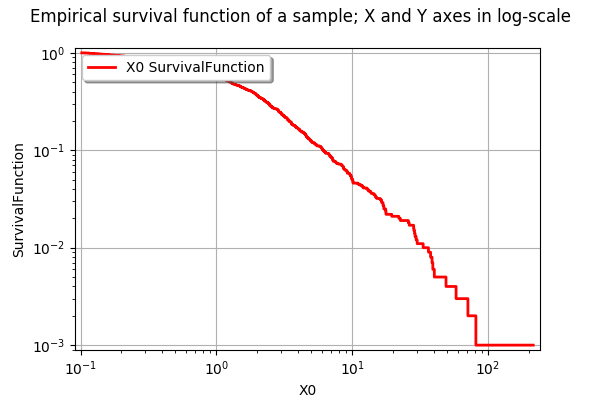

In [20]:
xmin = sample.getMin()[0]
xmax = sample.getMax()[0] - 1 # To avoid log(0) because P(X>Xmax)=0
pointNumber = sample.getSize()
logScaleX = True
graph = userdefined.drawSurvivalFunction(xmin, xmax, pointNumber, logScaleX)
graph.setLogScale(ot.GraphImplementation.LOGXY)
graph.setTitle("Empirical survival function of a sample; X and Y axes in log-scale")
graph

## Compare the distribution and the sample with respect to the survival

In the final example, we compare the distribution and sample survival functions in the same graphics. 

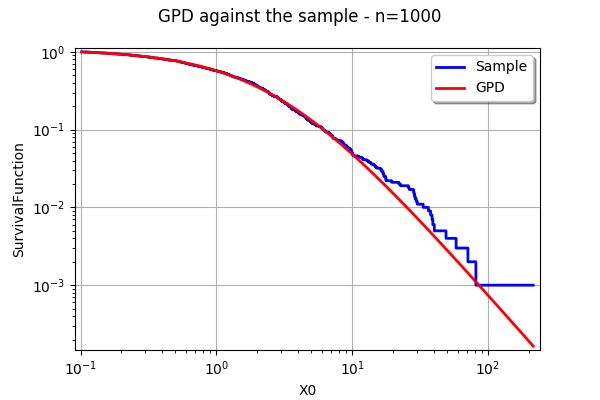

In [21]:
xmin = sample.getMin()[0]
xmax = sample.getMax()[0] - 1 # To avoid log(0) because P(X>Xmax)=0
npoints = 50
logScaleX = True
graph = userdefined.drawSurvivalFunction(xmin, xmax, pointNumber, logScaleX)
graph.setLogScale(ot.GraphImplementation.LOGXY)
graph.setColors(["blue"])
graph.setLegends(["Sample"])
graphDistribution = distribution.drawSurvivalFunction(xmin, xmax, npoints, logScaleX)
graphDistribution.setLegends(["GPD"])
graph.add(graphDistribution)
graph.setLegendPosition("topright")
graph.setTitle("GPD against the sample - n=%d" % (sample.getSize()))
graph